In [15]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Apriori\Order2.csv',header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.map(str)


In [18]:

print(df.columns)
print(df.dtypes)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object


In [19]:
# Step 2: Generate the List of Transactions
# -----------------------------------------
# Convert the dataset to a list of transactions (list of lists of items)
transactions = df.values.tolist()

# Display the first few transactions to check
print("\nFirst few transactions:")
print(transactions[:5])



First few transactions:
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']]


In [20]:
# Step 3: Prepare the Transaction Data for Apriori
# -----------------------------------------------
# Use TransactionEncoder to convert the transactions into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the result into a DataFrame
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the one-hot encoded transaction data
print("\nOne-Hot Encoded Transaction DataFrame:")
print(transaction_df.head())



One-Hot Encoded Transaction DataFrame:
    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   w

In [21]:
# Step 4: Apply the Apriori Algorithm
# -----------------------------------
# Apply the Apriori algorithm to find frequent itemsets
# Choose a minimum support threshold (e.g., min_support=0.005 for 0.5% frequency)
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)

# Display the frequent itemsets found by the Apriori algorithm
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
       support                                           itemsets
0     0.020397                                          (almonds)
1     0.008932                                (antioxydant juice)
2     0.033329                                          (avocado)
3     0.008666                                            (bacon)
4     0.010799                                   (barbecue sauce)
...        ...                                                ...
1442  0.007466              (nan, spaghetti, soup, mineral water)
1443  0.009332          (tomatoes, spaghetti, mineral water, nan)
1444  0.006399            (nan, spaghetti, turkey, mineral water)
1445  0.006266  (nan, spaghetti, whole wheat rice, mineral water)
1446  0.005066              (pancakes, spaghetti, olive oil, nan)

[1447 rows x 2 columns]


In [23]:
# Step 5: Generate Association Rules
# -----------------------------------
# If frequent itemsets are found, generate association rules
if not frequent_itemsets.empty:
    # Set a minimum confidence threshold for rule generation (e.g., min_confidence=0.3 for 30%)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3,num_itemsets=10)
    
    # Display the generated rules with relevant metrics
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No frequent itemsets found. Try reducing min_support to obtain more itemsets.")



Association Rules:
                            antecedents           consequents   support  \
0                             (almonds)                (eggs)  0.006532   
1                             (almonds)       (mineral water)  0.007599   
2                             (almonds)                 (nan)  0.020264   
3                   (antioxydant juice)                 (nan)  0.008799   
4                             (avocado)       (mineral water)  0.011598   
...                                 ...                   ...       ...   
1498      (spaghetti, whole wheat rice)  (nan, mineral water)  0.006266   
1499  (whole wheat rice, mineral water)      (nan, spaghetti)  0.006266   
1500   (pancakes, spaghetti, olive oil)                 (nan)  0.005066   
1501         (pancakes, olive oil, nan)           (spaghetti)  0.005066   
1502              (pancakes, olive oil)      (nan, spaghetti)  0.005066   

      confidence      lift  
0       0.320261  1.782108  
1       0.372549  1.5

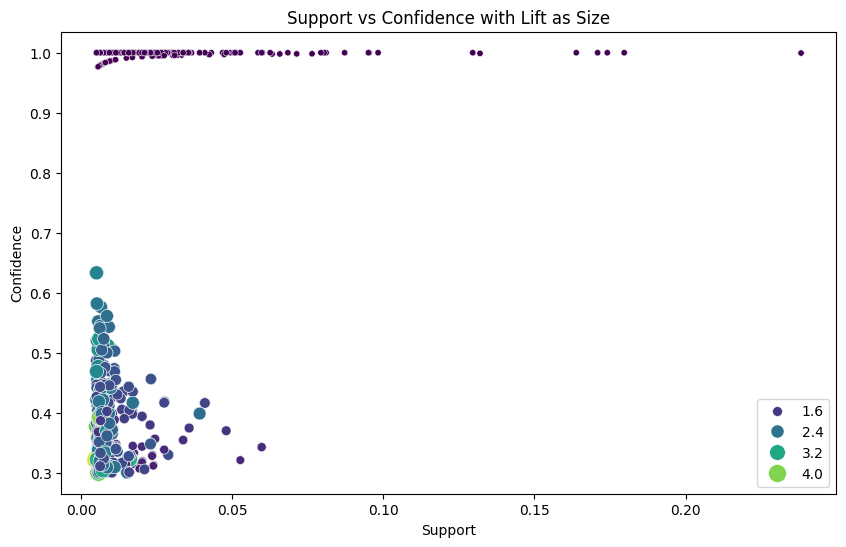

In [24]:
# Step 6: Visualize the Association Rules
# ---------------------------------------
# Check if rules DataFrame is not empty before visualizing
if not frequent_itemsets.empty:
    # Scatter plot to visualize Support vs Confidence with Lift as color and size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))
    plt.title('Support vs Confidence with Lift as Size')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend(loc='best')
    plt.show()
else:
    print("No rules to visualize.")